# (연습) 확률분포

**기본 설정**

Numpy와 Pandas 라이브러리를 각각 np와 pd로 불러온다.

In [ ]:
import numpy as np
import pandas as pd

데이터프레임의 [chained indexing을 금지시키기 위한 설정](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy)을 지정한다.
Pandas 3.0 버전부터는 기본 옵션으로 지정된다.

In [ ]:
pd.options.mode.copy_on_write = True

주피터 노트북에서 부동소수점의 출력을 소수점 이하 6자리로 제한한다.
아래 코드는 주피터 노트북에서만 사용하며 일반적인 파이썬 코드가 아니다.

In [ ]:
%precision 6

'%.6f'

아래 코드는 데이터프레임 내에서 부동소수점의 출력을 소수점 이하 6자리로 제한한다.

In [ ]:
pd.set_option('display.precision', 6)

데이터 시각화를 위해 `matplotlib.pyplot`를 `plt`라는 별칭으로 불러온다.

In [ ]:
import matplotlib.pyplot as plt

**데이터 저장소 디렉토리**

코드에 사용되는 [데이터 저장소의 기본 디렉토리](https://github.com/codingalzi/DataSci/tree/master/data)를 지정한다.

In [ ]:
data_url = 'https://raw.githubusercontent.com/codingalzi/DataSci/refs/heads/master/data/'

## 타이타닉 데이터셋

타이타닉호의 승객에 대한 정보와 생존 여부를 담은 데이터셋을 불러온다.

In [ ]:
titanic = pd.read_csv(data_url+"titanic.csv")

각 생존자별로 12개의 정보가 포함된다.

| 특성 | 의미 |
| :--- | :--- |
| PassengerId  | 승객 번호 |
| Survived | 생존 여부. 0 또는 1. 1일 때 생존 |
| Pclass | 승객 클래스 |
| Name | 승객 이름 |
| Sex | 승객의 성 |
| Age | 승객 나이 |
| SibSp | 타이타닉에 함께 승선한 형제자매와 배우자의 수 |
| Parch | 타이타닉에 함께 승선한 자녀와 부모의 수 |
| Ticket | 티켓 번호 |
| Fare | 티켓 요금(영구 파운드화) |
| Cabin | 객실 번호 |
| Embarked | 승객이 타이타닉호에 승선한 항구 |
| | C=Cherbourg, Q=Queenstown, S=Southampton |

In [ ]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


**인덱스 변경**

먼저 `PassengerId` 특성을 인덱스로 지정한다.

In [ ]:
titanic = titanic.set_index("PassengerId")

In [ ]:
titanic

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


**데이터분석 목표**

승객의 생존에 영향을 많이 끼친 특성을 파악한다.

### 결측치 처리

**결측치 확인**

데이터셋의 크기인 891보다 적은 수의 `non-null` 값을 갖는 특성에 결측치가 존재한다.
데이터프레임의 `info()` 메서드로 확인하면 `Age`, `Cabin`, `Embarked` 특성에
아래 표에 언급된 만큼의 결측치가 포함된다.

| 특성 | 결측치 수 |
| :--- | :---: |
| `Age` | 177 |
| `Cabin` | 687 |
| `Embarked` | 2 |

In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


- `Cabin` 특성 결측치:
    - 약 77%가 결측치다.
    - 이처럼 결측치의 비율이 너무 큰 경우엔 해당 특성을 무사하는 게 좋다.
- `Age` 특성 결측치
    - 보통 평균값 또는 중앙값으로 대체한다.
    - 경우에 따라 성별 또는 나이대별 나이의 평균값, 중앙값 등으로 대체하기도 한다.
    - 어떤 방식이 데이터분석의 목적에 보다 적합한가는 미리 알 수 없다.
- `Embarked` 특성 결측치
    - 범주형 특성의 결측치는 일반적으로 최빈값으로 대체한다.
    - 게다가 결측치가 2개밖에 없기에 최빈값으로 대체해도 데이터분석에 별 영향을 주지 않을 것이다.

**`Embarked` 특성 결측치 처리**

`Embarked` 특성의 결측치를 모두 해당 특성의 최빈값으로 대체한다.

In [ ]:
embarked_mode =(titanic['Embarked'].mode().values)[0]
embarked_mode

'S'

In [ ]:
titanic['Embarked'] = titanic['Embarked'].fillna(embarked_mode)

In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


**`Age` 특성 결측치 처리 방법 1: 특성 중앙값 활용**

`Age` 특성의 결측치를 다양한 방식으로 채운다.
따라서 `titanic` 데이터셋의  원본을 그대로 두고 복제해서 사용한다.

In [ ]:
titanic_median = titanic.copy()

`Age` 특성의 결측치를 모두 해당 특성의 중앙값으로 대체한다.

In [ ]:
age_median =titanic_median['Age'].median()
age_median

28.000000

In [ ]:
titanic_median['Age'] = titanic_median['Age'].fillna(age_median)

In [ ]:
titanic_median.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


**`Age` 특성 결측치 처리 방법 2: 성(Sex)별 중앙값 활용**

- 방식 1: 부울 인덱싱 활용

먼저 타이타닉 데이터셋을 복제한다.

In [ ]:
titanic_sex_median = titanic.copy()

여성과 남성의 중위연령을 확인한다.

In [ ]:
f_mask = titanic_sex_median["Sex"]=="female"
f_age_median = titanic_sex_median.loc[f_mask, "Age"].median()
print("여성 평균연령:", f_age_median)

여성 평균연령: 27.0


In [ ]:
m_mask = titanic_sex_median["Sex"]=="male"
m_age_median = titanic_sex_median.loc[m_mask, "Age"].median()
print("남성 평균연령:", m_age_median)

남성 평균연령: 29.0


부울 인덱싱으로 남녀별로 각각의 중위값으로 결측치를 대체한다.

In [ ]:
titanic_sex_median.loc[f_mask, 'Age'] = titanic_sex_median.loc[f_mask, 'Age'].fillna(f_age_median)
titanic_sex_median.loc[m_mask, 'Age'] = titanic_sex_median.loc[m_mask, 'Age'].fillna(m_age_median)

`Cabin` 특성을 제외한 모든 결측치가 사라졌음을 확인한다.

In [ ]:
titanic_sex_median.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


- 방식 2: `groupby()` 활용

먼저 타이타닉 데이터셋을 복제한다.

In [ ]:
titanic_sex_median = titanic.copy()

여성과 남성의 중위연령을 확인한다.

In [ ]:
titanic_sex_median.groupby('Sex')['Age'].median()

,Age
Sex,
female,27.0
male,29.0


아래 코드는 성별에 따라 결측치를 각각의 중위값으로 대체한다.

In [ ]:
titanic_sex_median_age = titanic_sex_median.groupby('Sex')['Age'].apply(lambda y:y.fillna(y.median()))
titanic_sex_median_age

Sex     PassengerId
female  2              38.0
        3              26.0
        4              35.0
        9              27.0
        10             14.0
                       ... 
male    884            28.0
        885            25.0
        887            27.0
        890            26.0
        891            32.0
Name: Age, Length: 891, dtype: float64

다중인덱스의 레벨 1에 위치한 `PassensgerId` 기준으로 오름차순으로 정렬한다.

In [ ]:
titanic_sex_median_age = titanic_sex_median_age.sort_index(level=1)
titanic_sex_median_age

Sex     PassengerId
male    1              22.0
female  2              38.0
        3              26.0
        4              35.0
male    5              35.0
                       ... 
        887            27.0
female  888            19.0
        889            27.0
male    890            26.0
        891            32.0
Name: Age, Length: 891, dtype: float64

`Age` 특성의 값으로 지정하면 나이의 모든 결측지가 성별 중위연령으로 대체된다.

In [ ]:
titanic_sex_median.loc[:, 'Age'] = titanic_sex_median_age.values

`Cabin` 특성을 제외한 모든 결측치가 사라졌음을 확인한다.

In [ ]:
titanic_sex_median.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


### 생존률 확인

`Survived` 특성의 통계 정보를 확인한다.

In [ ]:
titanic_sex_median['Survived'].describe()

,Survived
count,891.000000
mean,0.383838
std,0.486592
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


평균값이 약 0.38인데 이는 생존률이 약 38%임을 의미한다.
이유는 `Survived` 특성에 사용된 값이 0 또는 1이기에
해당 특성의 모든 값을 더한 값이 바로 생존자의 수와 같기 때문이다.
아래 코드는 총 891명 중에 생존자가 342명에 불과함을 확인해준다.

In [ ]:
titanic["Survived"].value_counts()

,count
Survived,
0,549
1,342


따라서 생존율은 다음과 같이 약 38%다.

In [ ]:
342/891

0.383838

그런데 영화 타이타닉(1997년 개봉)을 보면 성, 나이, 신분, 가족 유무 등에 따라 생존률이 많이 다를 것으로 기대된다.
여기서는 성과 나이대에 따라 생존률이 많아 달라짐을 보인다.

**성별 생존률**

성별 생존률은 `groupby()` 메서드로 바로 확인된다.
바로 위에서 설명한 대로 `Survived`의 그룹별 평균값이 그룹별 생존률이다.

여성의 생존률은 74%를 넘는 반면에 남성의 생존률은 채 20%가 되지 않는다.

In [ ]:
titanic_sex_median[["Sex", "Survived"]].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


**나이대별 생존률**

10년 기준으로 나이대를 지정하여 `Age_Bucket` 특성으로 추가한다.
아래 코드에 사용된 `astype('i8')` 또는 `astype('int64')`는 해당 특성에 포함된
값들의 자료형인 `dtype`을 정수형으로 지정한다.

In [ ]:
titanic_sex_median["Age_Bucket"] = (titanic_sex_median["Age"] // 10 * 10).astype('i8')
titanic_sex_median

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Bucket
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,20
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,30
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,20
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,30
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,30
...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,20
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,10
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,27.0,1,2,W./C. 6607,23.4500,NaN,S,20


나이대별 생존률은 다음과 같다.

In [ ]:
titanic_sex_median[["Age_Bucket", "Survived"]].groupby(['Age_Bucket']).mean()

,Survived
Age_Bucket,
0,0.612903
10,0.401961
20,0.324937
30,0.437126
40,0.382022
50,0.416667
60,0.315789
70,0.000000
80,1.000000


10살 미만의 생존률이 61%로 가장 높다.
구조 과정에서 아기와 아이들의 우선순위가 높았기 때문으로 추정된다.
반면에 80대가 100%의 생존률을 보인 반면에 70대의 생존률은 0%인 점이 특이하다.

이유는 80대보다 70대의 생존률이 높은 게 상식인데 그렇지 않기 때문이다.
이런 경우에는 보통 도수가 중요하다.
따라서 그룹별 도수를 확인해 본다.

In [ ]:
titanic_sex_median[["Age_Bucket", "Survived"]].groupby(['Age_Bucket']).count()

,Survived
Age_Bucket,
0,62
10,102
20,397
30,167
40,89
50,48
60,19
70,6
80,1


80대는 1명 뿐이었고, 그 한 명이 생존하였기에 100%의 생존률이 나왔는데,
70대의 6명은 모두 생존하지 못했다.
따라서 80대의 생존률이 100%인 것에 대해 큰 의미를 부여할 필요는 없다.

**성별+나이대별 생존률**

영화 타이타닉의 구조 과정에서 어린 아이들 뿐만 아니라 여성, 노약자 등을 우선적으로 구명보트에 태우는 것을 볼 수 있다.
이처럼 나이뿐만 아니라 성별도 생존률에 지대한 영향을 끼쳤을 것으로 추정할 수 있으며
이를 데이터로 확인해 본다.

아래 코드는 `Sex`와 `Age_Bucket`을 기준으로 그룹화를 진행한 다음에
그룹별로 생존률을 계산한다.
그룹화의 기준으로 두 개 이상의 특성을 사용할 수 있으며 그 결과는 어렵지 않게 이해된다.

- 먼저 언급된 `Sex`, 즉 성별로 그룹화 한다.
- 이후 각각의 그룹에 대해 `Age_Bucket`, 즉 나이대별로 그룹화 한다.

In [ ]:
titanic_sex_median[["Age_Bucket", "Sex", "Survived"]].groupby(['Sex', 'Age_Bucket']).mean()

Survived
Sex    Age_Bucket          
female 0           0.633333
       10          0.755556
       20          0.704000
       30          0.833333
       40          0.687500
       50          0.888889
       60          1.000000
male   0           0.593750
       10          0.122807
       20          0.150735
       30          0.214953
       40          0.210526
       50          0.133333
       60          0.133333
       70          0.000000
       80          1.000000

앞서 살펴본 대로 여성의 생존률이 약 74.2%인데
여성 50대는 약 89%, 그리고 60대는 100%의 여성 편균 생존률보다 훨씬 높다.

앞서 언급했듯이 이런 경우엔 도수도 확인해봐야 한다.

In [ ]:
titanic_sex_median[["Age_Bucket", "Sex", "Survived"]].groupby(['Sex', 'Age_Bucket']).count()

Survived
Sex    Age_Bucket          
female 0                 30
       10                45
       20               125
       30                60
       40                32
       50                18
       60                 4
male   0                 32
       10                57
       20               272
       30               107
       40                57
       50                30
       60                15
       70                 6
       80                 1

50대 여성은 18명, 60대 여성은 4명으로 무시하기 어렵다.
50대 이상의 여성의 생존률이 높은 이유는
노약자를 우선적으로 구명보트에 태웠기 때문인 것을로 추정된다.

반면에 10살 미만의 여자 아이들의 생존률이 타 여성연령그룹보다 상대적으로 낮으며,
10살 미만의 남자 아이들의 생존률은 타 남성연령그룹보다 상대적으로 높다.
이에 대한 이유는 명확하지 않다.

In [ ]:
mask = titanic_sex_median['Age'] < 10
titanic_sex_median[mask].groupby('Sex')['Survived'].mean()

,Survived
Sex,
female,0.633333
male,0.593750


참고로 10살 미만의 평균 생존률은 61.3%다.

In [ ]:
mask = titanic_sex_median['Age'] < 10
titanic_sex_median.loc[mask, 'Survived'].mean()

np.float64(0.6129032258064516)

**가족의 생존률**

`SisSp`는 형제자매와 배우자의 수를, `Parch`는 부모와 자식의 수를 가리킨다.
따라서 함께 타이타닉호에 탑승한 가족의 수는 두 특성의 합으로 계산된다.
아래 코드는 이를 새로운 특성으로 추가한다.

In [ ]:
titanic_sex_median["RelativesOnboard"] = titanic_sex_median["SibSp"] + titanic_sex_median["Parch"]

함께 탑승한 가족의 수에 따른 승객의 수는 다음과 같다.
가족이 0명, 즉 혼자 타이타닉호에 탑승한 승객이 537명으로 가장 많다.
그 다음으로 1명 또는 2명의 가족과 함께 탑승한 승객들이 많다.
최대 11명의 대가족으로 구성된 승객도 7명이나 된다.

In [ ]:
titanic_sex_median["RelativesOnboard"].value_counts().sort_index()

,count
RelativesOnboard,
0,537
1,161
2,102
3,29
4,15
5,22
6,12
7,6
10,7


함께 탑승한 가족수를 기준으로 그룹별 생존률을 확인하면 함께 탑승한 가족이 1명에서 3명일 때
승객의 생존률이 압도적으로 높다.
이또한 아무래도 어린 아이들과 노약자를 우선적으로 구조한 데에서 이유를 찾을 수 있을 것이다.

In [ ]:
titanic_sex_median[["RelativesOnboard", "Survived"]].groupby(['RelativesOnboard']).mean()

,Survived
RelativesOnboard,
0,0.303538
1,0.552795
2,0.578431
3,0.724138
4,0.200000
5,0.136364
6,0.333333
7,0.000000
10,0.000000


성별로 구분해서 보면 남성의 경우도 2명에서 4명으로 구성된 가족의 구성원인 경우
남평 평균의 생존률 18.8% 보다 훨씬 높다.

In [ ]:
titanic_sex_median[["Sex", "RelativesOnboard", "Survived"]].groupby(['Sex', 'RelativesOnboard']).mean()

Survived
Sex    RelativesOnboard          
female 0                 0.785714
       1                 0.816092
       2                 0.775510
       3                 0.842105
       4                 0.250000
       5                 0.375000
       6                 0.375000
       7                 0.000000
       10                0.000000
male   0                 0.155718
       1                 0.243243
       2                 0.396226
       3                 0.500000
       4                 0.000000
       5                 0.000000
       6                 0.250000
       7                 0.000000
       10                0.000000

## 연습문제

**문제 1**

(1) `Cabin` 특성에 결측치가 많다.
객실 정보가 있는 경우와 그렇지 않은 경우의 생존률을 확인하라.

힌트: `pd.isna()`, `pd.notna()` 함수 또는 `pd.DataFrame.isna()`, `pd.DataFrame.notna()` 메서드 활용

In [ ]:
mask = titanic["Cabin"].notna()
titanic_with_cabin = titanic[mask]
titanic_with_cabin

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...
872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C


In [ ]:
titanic_with_cabin["Survived"].sum() / len(titanic_with_cabin)

np.float64(0.6666666666666666)

In [ ]:
titanic_wo_cabin = titanic[~mask]
titanic_wo_cabin

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S


In [ ]:
titanic_wo_cabin["Survived"].sum() / len(titanic_wo_cabin)

np.float64(0.29985443959243085)

In [ ]:
titanic["Cabin?"] = titanic["Cabin"].notna()
titanic["Cabin?"]

,Cabin?
PassengerId,
1,False
2,True
3,False
4,True
5,False
...,...
887,False
888,True
889,False


In [ ]:
titanic_with_cabin_count = titanic.groupby(["Cabin?"])["Survived"].count()
titanic_with_cabin_count

,Survived
Cabin?,
False,687
True,204


In [ ]:
titanic.groupby("Cabin?")["Survived"].sum()

,Survived
Cabin?,
False,206
True,136


In [ ]:
titanic.groupby("Cabin?")["Survived"].sum() / titanic_with_cabin_count

,Survived
Cabin?,
False,0.299854
True,0.666667


(2) 여성의 생존률이 평균적으로 훨씬 높다. 객실 정보가 있는 경우 성별 생존률을 확인하라.

In [ ]:
titanic.groupby(["Cabin?", "Sex"])["Survived"].sum()

Cabin?  Sex   
False   female    142
        male       64
True    female     91
        male       45
Name: Survived, dtype: int64

In [ ]:
titanic_cabin_sex_count = titanic.groupby(["Cabin?", "Sex"])["Survived"].count()
titanic_cabin_sex_count

Cabin?  Sex   
False   female    217
        male      470
True    female     97
        male      107
Name: Survived, dtype: int64

In [ ]:
titanic.groupby(["Cabin?", "Sex"])["Survived"].sum() / titanic_cabin_sex_count

Cabin?  Sex   
False   female    0.654378
        male      0.136170
True    female    0.938144
        male      0.420561
Name: Survived, dtype: float64

(3) 객실 정보가 있는 경우 객실의 첫문자를 `C_Initial` 특성으로 추가하라.
또한 첫문자별 도수를 확인하라.

힌트: `pd.Series.map()` 메서드 활용

In [ ]:
cabin_feature = titanic["Cabin"]
cabin_feature

,Cabin
PassengerId,
1,NaN
2,C85
3,NaN
4,C123
5,NaN
...,...
887,NaN
888,B42
889,NaN


In [ ]:
cabin_info = cabin_feature.value_counts()
cabin_info

,count
Cabin,
G6,4
C23 C25 C27,4
B96 B98,4
F2,3
D,3
...,...
E17,1
A24,1
C50,1


In [ ]:
titanic["C_initial"] = cabin_feature.map(lambda s:s[0], na_action = 'ignore')
titanic["C_initial"]

,C_initial
PassengerId,
1,NaN
2,C
3,NaN
4,C
5,NaN
...,...
887,NaN
888,B
889,NaN


In [ ]:
titanic["C_initial"].value_counts()

,count
C_initial,
C,59
B,47
D,33
E,32
A,15
F,13
G,4
T,1


(4) 객실의 첫문자별로 객실의 요금의 평균값을 확인하라.

In [ ]:
cabin_fare = titanic.loc[:, ["C_initial", "Fare"]]
cabin_fare

,C_initial,Fare
PassengerId,,
1,NaN,7.2500
2,C,71.2833
3,NaN,7.9250
4,C,53.1000
5,NaN,8.0500
...,...,...
887,NaN,13.0000
888,B,30.0000
889,NaN,23.4500


In [ ]:
cabin_fare.groupby("C_initial").mean()

,Fare
C_initial,
A,39.623887
B,113.505764
C,100.151341
D,57.244576
E,46.026694
F,18.696792
G,13.581250
T,35.500000


(5) 객실의 첫문자별 생존률을 확인하라.

In [ ]:
cabin_Survived = titanic.loc[:, ["C_initial", "Fare", "Survived"]]
cabin_Survived

,C_initial,Fare,Survived
PassengerId,,,
1,NaN,7.2500,0
2,C,71.2833,1
3,NaN,7.9250,1
4,C,53.1000,1
5,NaN,8.0500,0
...,...,...,...
887,NaN,13.0000,0
888,B,30.0000,1
889,NaN,23.4500,0


In [ ]:
cabin_Survived.groupby("C_initial").mean()

,Fare,Survived
C_initial,,
A,39.623887,0.466667
B,113.505764,0.744681
C,100.151341,0.593220
D,57.244576,0.757576
E,46.026694,0.750000
F,18.696792,0.615385
G,13.581250,0.500000
T,35.500000,0.000000


(6) 객실의 첫문자별 남녀 생존률을 확인하라.

In [ ]:
cabin_Survived = titanic.loc[:, ["C_initial", "Sex", "Fare", "Survived"]]
cabin_Survived

,C_initial,Sex,Fare,Survived
PassengerId,,,,
1,NaN,male,7.2500,0
2,C,female,71.2833,1
3,NaN,female,7.9250,1
4,C,female,53.1000,1
5,NaN,male,8.0500,0
...,...,...,...,...
887,NaN,male,13.0000,0
888,B,female,30.0000,1
889,NaN,female,23.4500,0


In [ ]:
cabin_sex_survived_rate = cabin_Survived.groupby(["C_initial", "Sex"]).mean()
cabin_sex_survived_rate

Fare  Survived
C_initial Sex                         
A         female   39.600000  1.000000
          male     39.625593  0.428571
B         female  115.803085  1.000000
          male    110.404380  0.400000
C         female  117.226541  0.888889
          male     85.744141  0.343750
D         female   60.776628  1.000000
          male     53.006113  0.466667
E         female   56.414167  0.933333
          male     36.861276  0.588235
F         female   19.071660  1.000000
          male     18.462500  0.375000
G         female   13.581250  0.500000
T         male     35.500000  0.000000

In [ ]:
cabin_sex_survived_count = cabin_Survived.groupby(["C_initial", "Sex"]).count()
cabin_sex_survived_count

Fare  Survived
C_initial Sex                   
A         female     1         1
          male      14        14
B         female    27        27
          male      20        20
C         female    27        27
          male      32        32
D         female    18        18
          male      15        15
E         female    15        15
          male      17        17
F         female     5         5
          male       8         8
G         female     4         4
T         male       1         1

In [ ]:
cabin_sex_survived_sum =  cabin_Survived.groupby(["C_initial", "Sex"]).sum()
cabin_sex_survived_sum

Fare  Survived
C_initial Sex                        
A         female    39.6000         1
          male     554.7583         6
B         female  3126.6833        27
          male    2208.0876         8
C         female  3165.1166        24
          male    2743.8125        11
D         female  1093.9793        18
          male     795.0917         7
E         female   846.2125        14
          male     626.6417        10
F         female    95.3583         5
          male     147.7000         3
G         female    54.3250         2
T         male      35.5000         0

In [ ]:
cabin_summary = cabin_sex_survived_rate.copy()
cabin_summary.columns = ['요금평균', '생존률']
cabin_summary

요금평균       생존률
C_initial Sex                         
A         female   39.600000  1.000000
          male     39.625593  0.428571
B         female  115.803085  1.000000
          male    110.404380  0.400000
C         female  117.226541  0.888889
          male     85.744141  0.343750
D         female   60.776628  1.000000
          male     53.006113  0.466667
E         female   56.414167  0.933333
          male     36.861276  0.588235
F         female   19.071660  1.000000
          male     18.462500  0.375000
G         female   13.581250  0.500000
T         male     35.500000  0.000000

In [ ]:
cabin_summary["생존자수"] = cabin_sex_survived_sum.iloc[:, 1]
cabin_summary["도수"] = cabin_sex_survived_count.iloc[:, 1]
cabin_summary

요금평균       생존률  생존자수  도수
C_initial Sex                                   
A         female   39.600000  1.000000     1   1
          male     39.625593  0.428571     6  14
B         female  115.803085  1.000000    27  27
          male    110.404380  0.400000     8  20
C         female  117.226541  0.888889    24  27
          male     85.744141  0.343750    11  32
D         female   60.776628  1.000000    18  18
          male     53.006113  0.466667     7  15
E         female   56.414167  0.933333    14  15
          male     36.861276  0.588235    10  17
F         female   19.071660  1.000000     5   5
          male     18.462500  0.375000     3   8
G         female   13.581250  0.500000     2   4
T         male     35.500000  0.000000     0   1

**문제 2**

타이타닉호에 탑승했던 891명의 승객에서 1명을 무작위로 선택했을 때의 생존여부를 가리키는 확률변수를 X라 하자.
확률변수 X의 확률분포는 다음과 같다.
단, 0과 1은 각각 사망과 생존을 가리킨다.

| X | 0 | 1 |
| :---: | :---: | :---: |
| 확률 | 0.62 | 0.38 |

이유는 다음과 같이 타이타닉 승객의 생존률이 0.38이기 때문이다.

In [ ]:
titanic_sex_median['Survived'].mean()

np.float64(0.3838383838383838)

(1) 남자 승객에서 1명을 무작위로 선택했을 때의 생존여부를 가리키는 확률변수를 X라 하자.
확률변수 X의 확률분포를 구하라.

In [ ]:
titanic[["Sex", "Survived"]].groupby("Sex").mean()

,Survived
Sex,
female,0.742038
male,0.188908


(2) 객실 정보가 없는 여자 승객에서 1명을 무작위로 선택했을 때의 생존여부를 가리키는 확률변수를 X라 하자.
확률변수 X의 확률분포를 구하라.

In [ ]:
titanic[['Cabin?', 'Sex', 'Survived']].groupby(['Cabin?', 'Sex']).mean()

Survived
Cabin? Sex             
False  female  0.654378
       male    0.136170
True   female  0.938144
       male    0.420561

(3) C로 시작하는 객실 정보가 있는 남자 승객에서 1명을 무작위로 선택했을 때의 생존여부를 가리키는 확률변수를 X라 하자.
확률변수 X의 확률분포를 구하라.

In [ ]:
titanic[["C_initial", "Sex", "Survived"]].groupby(["C_initial", "Sex"]).mean()

Survived
C_initial Sex             
A         female  1.000000
          male    0.428571
B         female  1.000000
          male    0.400000
C         female  0.888889
          male    0.343750
D         female  1.000000
          male    0.466667
E         female  0.933333
          male    0.588235
F         female  1.000000
          male    0.375000
G         female  0.500000
T         male    0.000000

**문제 3**

타이타닉 호의 객실의 첫문자를 객실을 구분하는 범주로 사용했을 때 각 범주별 도수를 확인한다.

- `value_counts()` 메서드의 `dropna=False` 키워드 인자: 결측치도 하나의 범주로 취급함.

In [ ]:
c_initial = titanic['C_initial'].value_counts(dropna=False).sort_index()
c_initial

,count
C_initial,
A,15
B,47
C,59
D,33
E,32
F,13
G,4
T,1
NaN,687


(1) 타이타닉호에 탑승했던 891명의 승객에서 무작위로 선택된 승객이 속하는 객실의 범주를 가리키는 확률변수를 X라 하자.
확률변수 X의 확률분포를 구하라.

힌트: `pd.DataFrame.value_counts()` 메서드의 `dropna=False` 키워드 인자 활용

In [ ]:
(c_initial / c_initial.sum()).round(decimals=3)

,count
C_initial,
A,0.017
B,0.053
C,0.066
D,0.037
E,0.036
F,0.015
G,0.004
T,0.001
NaN,0.771


(2) 타이타닉호에 탑승했던 여성 승객에서 무작위로 선택된 승객이 속하는 객실의 범주를 가리키는 확률변수를 X라 하자.
확률변수 X의 확률분포를 구하라.

힌트: `pd.crosstab()` 함수의 `dropna=False` 키워드 인자 활용.

In [ ]:
c_initial_sex = pd.crosstab(titanic.C_initial, titanic.Sex, dropna=False)
c_initial_sex

Sex,female,male
C_initial,,
A,1,14
B,27,20
C,27,32
D,18,15
E,15,17
F,5,8
G,4,0
T,0,1
NaN,217,470


In [ ]:
c_initial_woman = c_initial_sex.loc[:,["female"]]
c_initial_woman

Sex,female
C_initial,
A,1
B,27
C,27
D,18
E,15
F,5
G,4
T,0
NaN,217


In [ ]:
(c_initial_woman / c_initial_woman.sum()).round(decimals=3)

Sex,female
C_initial,
A,0.003
B,0.086
C,0.086
D,0.057
E,0.048
F,0.016
G,0.013
T,0.000
NaN,0.691


`Name` 특성만을 이용하여 다양한 경우에 대한 생존률을 계산하라.

힌트: 아래 두 사이트의 내용을 참고한다.

- [Titanic using Name only [0.81818]](https://www.kaggle.com/code/cdeotte/titanic-using-name-only-0-81818)
- [Notes of Titanic on Kaggle](https://typewind.github.io/2017/07/25/titanic/)

In [ ]:
import re

# Case 1 : Name 특성만을 활용해 성별 생존율 파악하기

In [ ]:
titanic1 = titanic.copy()

In [ ]:
def get_prefix_sex(dataset):
  names = dataset["Name"]
  prefix=[]
  for name in names:
    prefix.append(re.search(',(.*?)\.', name).group(1))
  dataset["Prefix_Sex"] = pd.Series(prefix, index=dataset.index)
  prefix = pd.Series(dataset["Prefix_Sex"])
  prefix = prefix.replace([" Mr", " Sir", " Master"], "M")
  prefix = prefix.replace([" Miss", " Mrs", " Ms", " Mme", " Mlle", " Lady"], "F")
  prefix = prefix.replace([" Major", " Dr", " Rev", " Col", " the Countess", " Capt", " Don", " Jonkheer"], "Unknown")
  dataset["Prefix_Sex"]=prefix
  return prefix

In [ ]:
get_prefix_sex(titanic1)

,Prefix_Sex
PassengerId,
1,M
2,F
3,F
4,F
5,M
...,...
887,Unknown
888,F
889,F


In [ ]:
titanic1 = titanic1[titanic1["Prefix_Sex"] != "Unknown"] #Unknown 제거

In [ ]:
pre_group_Sex = titanic1.groupby("Prefix_Sex", group_keys=True) #성별로 구분

전체 인원 중 Unknown을 뺀 만큼의 인원 수 확인

In [ ]:
titanic1["Prefix_Sex"].count()

np.int64(870)

In [ ]:
pre_survived = pre_group_Sex.count()["Survived"]
pre_survived

,Survived
Prefix_Sex,
F,312
M,558


Name 특성만으로 성별을 나눴을때의 생존율

In [ ]:
pre_group_Sex["Survived"].mean()

,Survived
Prefix_Sex,
F,0.740385
M,0.188172


기존 타이타닉 데이터셋을 성별 생존율

In [ ]:
check = titanic.groupby("Sex", group_keys=True)
check["Survived"].mean()

,Survived
Sex,
female,0.742038
male,0.188908


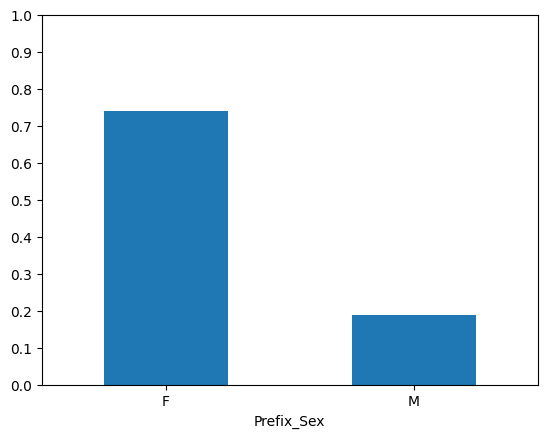

In [ ]:
pre_group_Sex["Survived"].mean().plot.bar()
plt.xticks(rotation = 0)
plt.yticks(np.arange(0,1.1,0.1))
plt.show()

# Case 2 : 결혼 여부로 나누었을 때 생존율에 영향을 미칠까?(여성)

In [ ]:
titanic_Marriage = titanic.copy()

In [ ]:
def get_prefix_Marriage(dataset):
  names = dataset["Name"]
  prefix=[]
  for name in names:
    prefix.append(re.search(',(.*?)\.', name).group(1))
  dataset["Prefix_Marriage"] = pd.Series(prefix, index=dataset.index)
  prefix = pd.Series(dataset["Prefix_Marriage"])
  prefix = prefix.replace([" Mr", " Sir"], "M")                #남성에게 붙이는 호칭
  prefix = prefix.replace(" Master", "Boy")                    #남자 청소년에게 붙이는 호칭
  prefix = prefix.replace([" Mrs", " Mme"], "Married F")       #Mrs, Mme는 결혼을 한 여성들에게 붙이는 호칭
  prefix = prefix.replace([" Mlle", " Ms", " Miss"], "Unmarried F")     #Miss, Mlle, Ms는 결혼을 하지 않은 여성들에게 붙이는 호칭
  prefix = prefix.replace([" Major", " Dr", " Rev", " Col", " the Countess", " Capt", " Don", " Jonkheer", " Lady"], "Unknown")
  dataset["Prefix_Marriage"]=prefix
  return prefix

In [ ]:
get_prefix_Marriage(titanic_Marriage)

,Prefix_Marriage
PassengerId,
1,M
2,Married F
3,Unmarried F
4,Married F
5,M
...,...
887,Unknown
888,Unmarried F
889,Unmarried F


In [ ]:
titanic_Marriage = titanic_Marriage[titanic_Marriage["Prefix_Marriage"] != "Unknown"] #Unknown 제거

In [ ]:
pre_group_Marriage = titanic_Marriage.groupby("Prefix_Marriage", group_keys=True) #결혼 여부로 구분

In [ ]:
pre_group_Marriage["Survived"].count()

,Survived
Prefix_Marriage,
Boy,40
M,518
Married F,126
Unmarried F,185


결혼을 했다면, 같이 탑승한 가족이 있을 거라고 판단하였고,  
본인의 가족의 생존을 우선시 하기에 생존율이 결혼을 한 여성이 미혼인 여성보다도 더 높을 것이라고 판단됨.

결혼을 한 여성의 생존율이 9% 정도 높다는 것을 알 수 있음.

In [ ]:
pre_group_Marriage["Survived"].mean()

,Survived
Prefix_Marriage,
Boy,0.575000
M,0.158301
Married F,0.793651
Unmarried F,0.702703


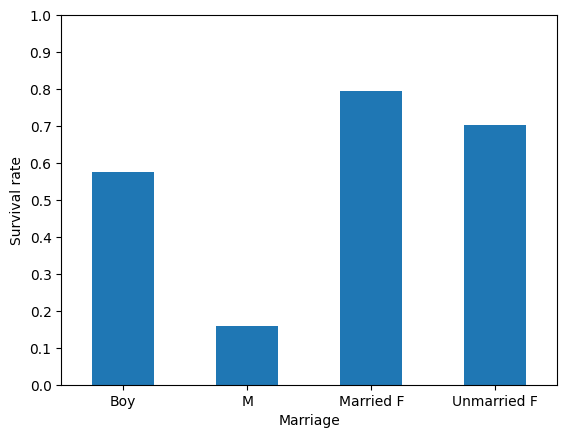

In [ ]:
pre_group_Marriage["Survived"].mean().plot.bar()
plt.xticks(rotation = 0)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlabel("Marriage")
plt.ylabel("Survival rate")
plt.show()

# Case 3 : 같은 성씨를 가진 사람들이 여러명인 경우가 생존율에 영향을 미칠까?

In [ ]:
titanic_name = titanic.copy()

In [ ]:
get_prefix_sex(titanic_name)

,Prefix_Sex
PassengerId,
1,M
2,F
3,F
4,F
5,M
...,...
887,Unknown
888,F
889,F


In [ ]:
titanic_name["LastName"] = titanic_name["Name"].apply(lambda x:x.split(',')[0])
lastname = titanic_name.groupby("LastName", group_keys=True)["Survived"]

In [ ]:
lastname.count().sort_values(ascending=False).head(15)    #ascending=False : 내림차순

,Survived
LastName,
Andersson,9
Sage,7
Johnson,6
Panula,6
Goodwin,6
Skoog,6
Carter,6
Rice,5
Smith,4


같은 성씨의 사람의 총합이 2 이상이면 More, 아니라면 Alone

In [ ]:
name_counts = titanic_name["LastName"].value_counts()
titanic_name["AorM"] = titanic_name["LastName"].apply(lambda x:"More" if name_counts[x] >= 2 else "Alone")
titanic_name["AorM"]

,AorM
PassengerId,
1,More
2,Alone
3,Alone
4,More
5,More
...,...
887,Alone
888,More
889,More


In [ ]:
titanic_MorA = titanic_name.groupby("AorM", group_keys=True)
titanic_MorA["Survived"].mean()

,Survived
AorM,
Alone,0.359551
More,0.420168


Alone이면서 성별로 나눴을때, More이면서 성별로 나눴을때 인원 수의 총합

In [ ]:
group_survived = titanic_name.groupby(["AorM", "Prefix_Sex"], group_keys=True)["Survived"]
group_survived.count()

AorM   Prefix_Sex
Alone  F             153
       M             365
       Unknown        16
More   F             159
       M             193
       Unknown         5
Name: Survived, dtype: int64

Alone이면서 성별로 나눴을때, More이면서 성별로 나눴을때 생존율

In [ ]:
group_survived.mean()

AorM   Prefix_Sex
Alone  F             0.816993
       M             0.169863
       Unknown       0.312500
More   F             0.666667
       M             0.222798
       Unknown       0.200000
Name: Survived, dtype: float64

Text(0, 0.5, 'Survival rate')

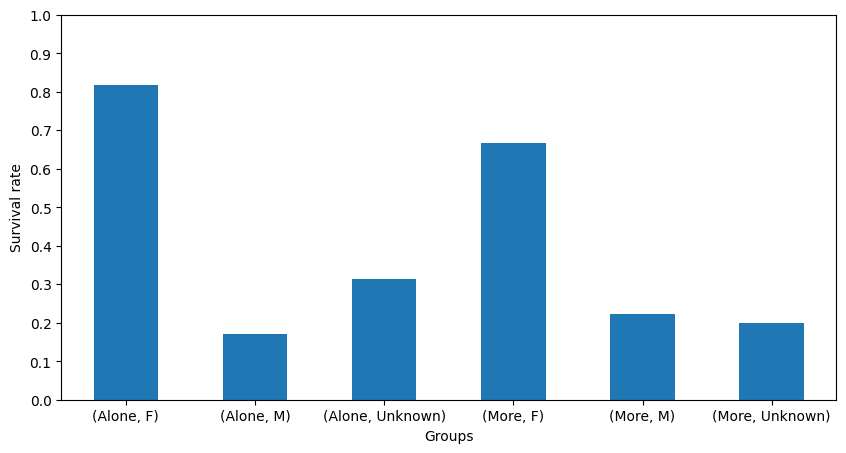

In [ ]:
plt.figure(figsize=(10,5))
group_survived.mean().plot.bar()
plt.xticks(rotation = 0)
plt.yticks(np.arange(0,1.1,0.1))
plt.xlabel("Groups")
plt.ylabel("Survival rate")

# Case 4 : 이름의 길이가 생존율에 영향을 미칠까?

Name 특성에서 이름의 길이의 평균값이 약 27인것을 알 수 있다.

In [ ]:
titanic["Name"].apply(len).mean()

np.float64(26.9652076318743)

이름이 27을 넘긴다면 Long이라고 지정하고, 그렇지 않다면 Short라고 지정한다.

In [ ]:
titanic_name["Length"] = titanic_name["Name"].apply(lambda x: "Long" if len(x) >=27 else "Short")
titanic_name["Length"]

,Length
PassengerId,
1,Short
2,Long
3,Short
4,Long
5,Short
...,...
887,Short
888,Long
889,Long


이름의 길이에 따라 그룹화하여 생존율을 분석해보자

In [ ]:
titanic_len = titanic_name.groupby("Length", group_keys=True)["Survived"]
titanic_len.count()

,Survived
Length,
Long,384
Short,507


In [ ]:
titanic_len.mean()

,Survived
Length,
Long,0.533854
Short,0.270217


이름의 길이가 길때 생존율이 더 높다는 것을 알 수 있다.

타이타닉 데이터셋 Name 특성을 보면,  
결혼여부에 따라 본인의 남편 이름도 포함되어 있는 경우도 있는 경우도 있고,  
시대상황에 따라 이름이 길었을 때 상류층으로 추정되기에 이것 또한 생존율에 영향을 미쳤다고 판단한다.

In [ ]:
test = titanic_name.groupby(["Length", "Prefix_Sex"], group_keys=True)["Survived"]
test.mean()

Length  Prefix_Sex
Long    F             0.745098
        M             0.285714
        Unknown       0.416667
Short   F             0.731481
        M             0.146154
        Unknown       0.111111
Name: Survived, dtype: float64

In [ ]:
test.count()

Length  Prefix_Sex
Long    F             204
        M             168
        Unknown        12
Short   F             108
        M             390
        Unknown         9
Name: Survived, dtype: int64

Text(0, 0.5, 'Survival rate')

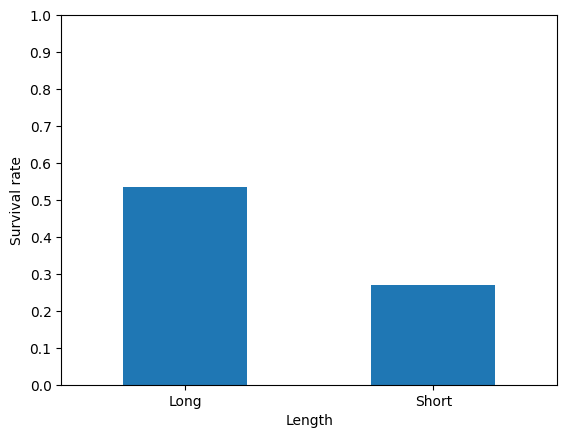

In [ ]:
titanic_len.mean().plot.bar()
plt.xticks(rotation = 0)
plt.yticks(np.arange(0,1.1,0.1))
plt.xlabel("Length")
plt.ylabel("Survival rate")